# Example 2 (EX2)

__Summary:__  The simplest way to make the atmosphere move is to have it rotate as a sphere slightly faster than the earth. This is uniform super rotation and the rate is equal to the global average westward wind speed at each level. A forcing is added to maintain this basic state and the same equatorial heating perturbation now produces Rossby waves that emanate form the equator onto midlatitudes on great circle pathways. 

## How to run the model and produce netcdf outputs:

* Go to the terminal window.
* Go to the jobs directory: `cd  ~/work/DREAM/dream_model/jobs`
* Run the model script for EX2: `./runmodel_v8.4_EX2.sh`

* In the terminal go to the diagnostics directory: `cd ~/work/DREAM/dream_model/diagnostics/`,
* Run the diagnostics script: `./run_output.sh EX2`.
* The model outputs and diagnostics will be saved in `DREAM/dream_results/EX2/netcdfs/`

# Open and plot results with Python

## Import Python Packages


In [1]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr
    
# plot
import cartopy.crs as ccrs
import cartopy.feature as ccf
import cartopy.util as ccu
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.animation as animation

import ipywidgets as widgets
from IPython.display import display, HTML, Image, clear_output



# My custom module with plot tools
import utils_SLX_plots_dream as slx


# Only if using jupyter notebook. Otherwise, comment out.
%matplotlib inline 

---
## Read DREAM model outputs:

* Set parameters:

In [30]:
EXPID="EX2"

# local directory of input files (in the DOcker container)
diri = "/home/jovyan/work/DREAM/dream_results/"+EXPID+"/netcdfs/"

# input file
fili  = "dreamT31L15_gph_250.nc"
fili2 = "dreamT31L15_u_250.nc"

# where to save output plots and movies
diro = "/home/jovyan/work/DREAM/dream_results/"+EXPID+"/plots/"

* Read data (with the python package xarray):

In [3]:
zanom = xr.open_dataset(diri+fili,decode_times=True)['gph'].squeeze()

uanom = xr.open_dataset(diri+fili2,decode_times=True)['u'].squeeze()

# number of time frames in this experiment
NTF=zanom.time.size

---
## Look at the wind profile at t0 (super-rotation wind profile)
and compare to expected cosine shape

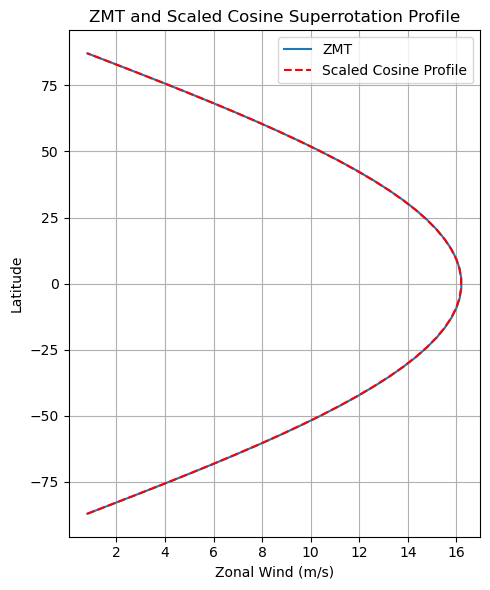

In [31]:
# zonal wind profile (averaged over longitudes) at initial time
ZMT = uanom.isel(time=0).mean(dim='lon')


# Get latitude values (degrees) and convert to radians
latitudes = ZMT['lat'].values
lat_radians = np.radians(latitudes)

# Compute cosine shape
cos_shape = np.cos(lat_radians)

# Scale cosine to match the amplitude of your ZMT
# Option 1: Match max value
amplitude = np.max(np.abs(ZMT)).values  
u_cosine_scaled = amplitude * cos_shape

# Plot
plt.figure(figsize=(5, 6))
plt.plot(ZMT, latitudes, label='ZMT')
plt.plot(u_cosine_scaled, latitudes, '--', color='red', label='Scaled Cosine Profile')

plt.xlabel('Zonal Wind (m/s)')
plt.ylabel('Latitude')
plt.title('ZMT and Scaled Cosine Superrotation Profile')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Now let's look at the model developments in U250 in response to the heating anomaly

* Print max, min, mean values of all array

In [5]:
print(uanom.max().values)
print(uanom.mean().values)
print(uanom.min().values)

-556.6191148527167
-605.0529249738336
-624.5964930985483


* Plot settings

In [34]:
#------------ geography
# Global plot? True/False
glo= True

# center longitude on:
loncentr=180.

# set coastL to True if you want coaslines
coastL=False

#------------ color shading

# type of plot (can be 'contourf', 'pcolormesh', defaut is contourf)

typlo='contourf'

# min max values on the colorscale
vmin=0
vmax=25

# colormap
cm_base=slx.make_NCLcolormap()

# number of color segments of the colormap
Nincr=25

# color of the values smaller than vmin
su='#EFF5FB'
# color of the values larger than vmax
so='#F8E0E0'

# colorbar label 
labelplt= "250 hPa Zonal wind ("+uanom.units+")"

# number of labels on the colorbar
Nbar=5

#------------ plot output
# plot format
pltty = ".png"


# plot resolution (dpi)
dpifig=200

# base name for output plot file
plti="U250_"+EXPID


* plot each time frame as png

Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//U250_EX2.0000.png


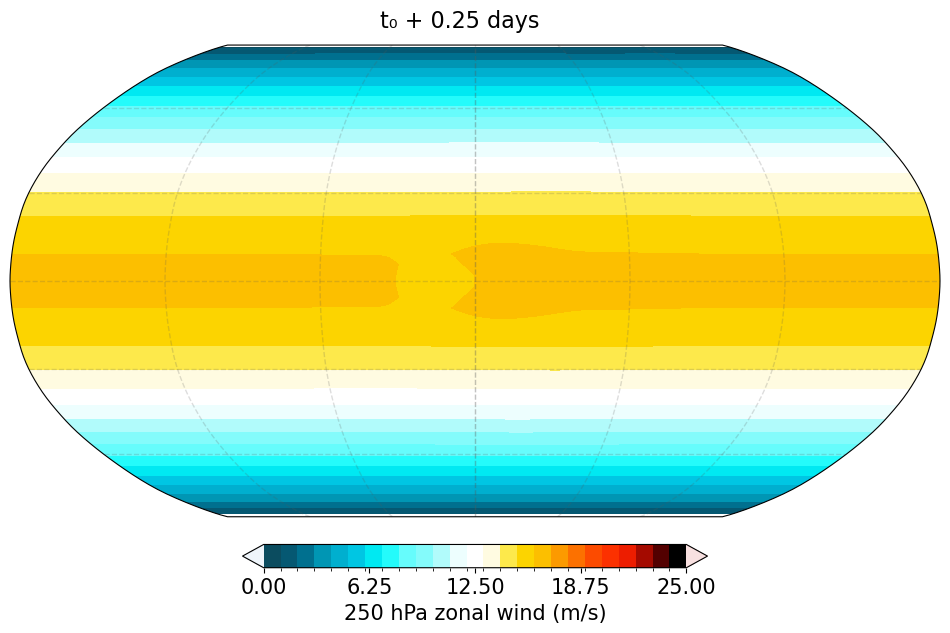

Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//U250_EX2.0001.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//U250_EX2.0002.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//U250_EX2.0003.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//U250_EX2.0004.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//U250_EX2.0005.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//U250_EX2.0006.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//U250_EX2.0007.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//U250_EX2.0008.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//U250_EX2.0009.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//U250_EX2.0010.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//U250_EX2.0011.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//U250_EX2.0012.png
Saved to ... /home/jovyan/work/DREAM/dre

In [19]:
# loop on all time steps in the data array:
for it in range(0,NTF):
                
            # output plot file name including the time index
            plto = plti+"."+str(it).zfill(4)

            # data to plot (must be a 2-d np.array)
            # here we select one timestep at a time for plotting purposes
            data2plot  = uanom.isel(time=it).values

            # make the data to plot cyclic so that the values at longitude 0 are repeated at 360. (for plot purposes)
            cyclic_data, cyclic_lons = ccu.add_cyclic_point(data2plot, coord=uanom.lon.values)

            #----------------------------------------------------
            #------ PLOT ----------------------------------------
            #----------------------------------------------------

            # create fig
            fig1 = plt.figure(figsize=([12,9]),facecolor='white')

            # plot data (base plot from plotmap functionn defined above)
            
            cs = slx.plotmap(fig1,cyclic_data,cyclic_lons,uanom.lat.values,plto,cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,glo=glo,coastL=coastL,su=su,so=so,loncentr=loncentr,typlo=typlo,Nbar=Nbar,labelplt=labelplt)

            # add title on plot (date)
            #plt.title(slx.printdatestring(airanom.time.to_index(),it))
            # Compute days since t0
            t0 = uanom.time[0].values
            current_time = uanom.time[it].values
            delta_days = (np.datetime64(current_time) - np.datetime64(t0)) / np.timedelta64(1, 'D')
            title_text = fig1.text(0.5, 0.8, f"t₀ + {delta_days:.2f} days", ha='center', fontsize=16)

            if it==1:
                # display plot only once in the loop
                plt.show()
    
            # Save fig in png, resolution dpi
            fig1.savefig(diro+"/"+plto+'.png', facecolor=fig1.get_facecolor(), edgecolor='none', dpi=dpifig,bbox_inches='tight', pad_inches=0)
            print("Saved to ... "+diro+"/"+plto+'.png')
            # close fig
            plt.close(fig1)    

#print("INITAL STATE:")
#display(Image(os.path.join(diro+"Z100_EX1b.101.png")))
#print('NOTE: All intermediate frames have been saved to '+diro)

* Go throught (and display)  all frames with the slider:

In [39]:
# view figures
slider_expe = widgets.IntSlider(
    value=0,
    min=0,
    max=0+NTF-1,
    step=1,
    description='Time slider:',
    continuous_update=False
)
output_expe = widgets.Output()

def update_plot(it):
    with output_expe:
        clear_output(wait=True)
        tim = str(it).zfill(4)
        display(Image(filename=os.path.join(diro+"U250_"+EXPID+"."+tim+".png")))

widgets.interact(update_plot, it=slider_expe)
display(output_expe)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time slider:', max=80), Output(…

Output()

## A quick look at  at Z250 too...

In [35]:

# min max values on the colorscale
vmin=-650
vmax=-570

# colorbar label 
labelplt= "250 hPa Geopot. height ("+zanom.units+")"

# number of labels on the colorbar
Nbar=3


# base name for output plot file
plti="Z250_"+EXPID


#### Plot and save single png maps for each timeframe

Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//Z250_EX2.0000.png


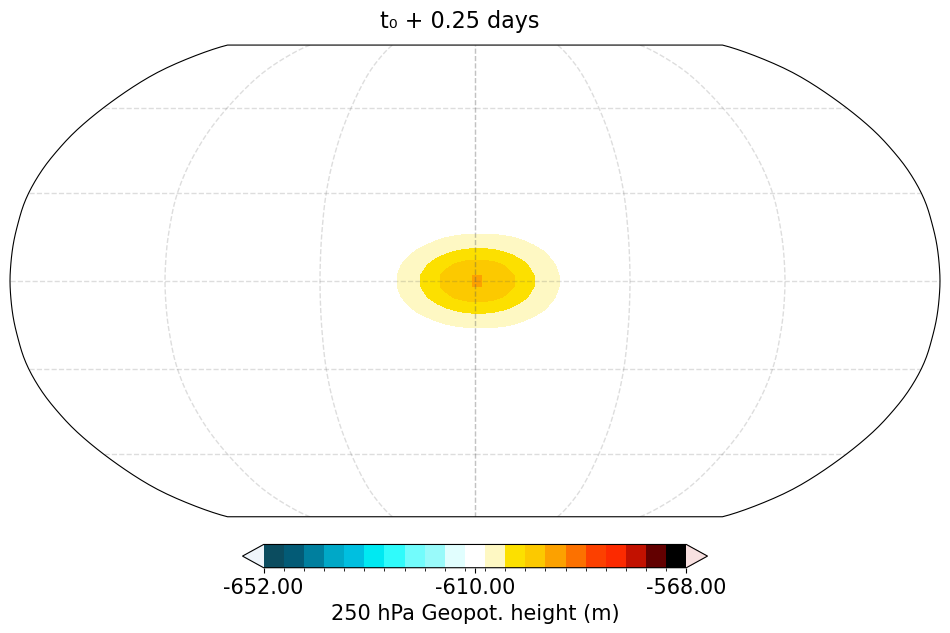

Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//Z250_EX2.0001.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//Z250_EX2.0002.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//Z250_EX2.0003.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//Z250_EX2.0004.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//Z250_EX2.0005.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//Z250_EX2.0006.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//Z250_EX2.0007.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//Z250_EX2.0008.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//Z250_EX2.0009.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//Z250_EX2.0010.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//Z250_EX2.0011.png
Saved to ... /home/jovyan/work/DREAM/dream_results/EX2/plots//Z250_EX2.0012.png
Saved to ... /home/jovyan/work/DREAM/dre

In [36]:
# loop on all time steps in the data array:
for it in range(0,NTF):
                
            # output plot file name including the time index
            plto = plti+"."+str(it).zfill(4)

            # data to plot (must be a 2-d np.array)
            # here we select one timestep at a time for plotting purposes
            data2plot  = zanom.isel(time=it).values

            # make the data to plot cyclic so that the values at longitude 0 are repeated at 360. (for plot purposes)
            cyclic_data, cyclic_lons = ccu.add_cyclic_point(data2plot, coord=zanom.lon.values)

            #----------------------------------------------------
            #------ PLOT ----------------------------------------
            #----------------------------------------------------

            # create fig
            fig1 = plt.figure(figsize=([12,9]),facecolor='white')

            # plot data (base plot from plotmap functionn defined above)
            
            cs = slx.plotmap(fig1,cyclic_data,cyclic_lons,zanom.lat.values,plto,cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,glo=glo,coastL=coastL,su=su,so=so,loncentr=loncentr,typlo=typlo,Nbar=Nbar,labelplt=labelplt)

            # add title on plot (date)
            #plt.title(slx.printdatestring(airanom.time.to_index(),it))
            # Compute days since t0
            t0 = zanom.time[0].values
            current_time = zanom.time[it].values
            delta_days = (np.datetime64(current_time) - np.datetime64(t0)) / np.timedelta64(1, 'D')
            title_text = fig1.text(0.5, 0.8, f"t₀ + {delta_days:.2f} days", ha='center', fontsize=16)

            if it==1:
                # display plot only once in the loop
                plt.show()
    
            # Save fig in png, resolution dpi
            fig1.savefig(diro+"/"+plto+'.png', facecolor=fig1.get_facecolor(), edgecolor='none', dpi=dpifig,bbox_inches='tight', pad_inches=0)
            print("Saved to ... "+diro+"/"+plto+'.png')
            # close fig
            plt.close(fig1)    

#print("INITAL STATE:")
#display(Image(os.path.join(diro+"Z100_EX1b.101.png")))
#print('NOTE: All intermediate frames have been saved to '+diro)

In [38]:
# view figures
slider_expe = widgets.IntSlider(
    value=0,
    min=0,
    max=0+NTF-1,
    step=1,
    description='Time slider:',
    continuous_update=False
)
output_expe = widgets.Output()

def update_plot(it):
    with output_expe:
        clear_output(wait=True)
        tim = str(it).zfill(4)
        display(Image(filename=os.path.join(diro+"Z250_"+EXPID+"."+tim+".png")))

widgets.interact(update_plot, it=slider_expe)
display(output_expe)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time slider:', max=80), Output(…

Output()